# Speed dating data manipulation #Block2
Jedha certification - speed dating project.

In [131]:
# import
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

### Configurations


In [132]:
config = json.load(open("../config.json", "r"))
color_palette = config["color_palette"]
display(f"Customize color : {color_palette}")

"Customize color : ['#a44a3f', '#DFCEEB', '#c7ac92', '#DBDE2F', '#265952', '#45201E']"

In [133]:
# searbon customize palette color
sns.set_palette(sns.color_palette(color_palette))
sns.set_theme()
# sns.set_style("whitegrid")

### Dataset

In [134]:
# load dataframe
def load_data(file_name) :
    """ load_data()
    """
    # read
    df_dating = pd.read_csv(file_name, encoding='ISO-8859-1')
    display(df_dating.sample(2))
    return df_dating

## RUN
file_name = "../data/Speed Dating Data.csv"
df_dating = load_data(file_name)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
4934,332,1.0,1,2,1,13,10,1,1.0,8,...,5.0,10.0,7.0,7.0,10.0,5.0,9.0,6.0,5.0,10.0
7283,493,13.0,1,25,2,19,15,6,11.0,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Descriptive statistics
Describe dataset, verify come assumptions & others stuff.

#### General stats

In [135]:
## info
display(df_dating.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


None

In [136]:
## columns
columns_name = df_dating.columns
print(f"Features in dataset are : {columns_name}")



Features in dataset are : Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)


In [137]:
## number of values
n_records, n_features = df_dating.shape[0], df_dating.shape[1]
print("Dataset contains {} results and {} features.".format(n_records, n_features))

Dataset contains 8378 results and 195 features.


In [138]:
## number of different people
n_people = df_dating["iid"].max()
print("We have {} unique people in dataset.".format(n_people))

We have 552 unique people in dataset.


#### Gender and race 
assumption : Is communuatarism a primary attribute in the choice of a partner?

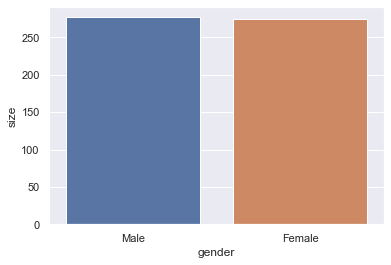

In [139]:
## gender proportion
### apply func
def gender_number_to_name(x) :
    gender_name = None
    if x == 1 :
        gender_name = "Male"
    if x == 0 :
        gender_name = "Female"
    return gender_name
    
df_gender = (df_dating[["iid", "gender"]].groupby(["iid", "gender"]).first()).reset_index()["gender"].value_counts()
df_gender = pd.DataFrame(df_gender).reset_index()
df_gender = df_gender.rename(columns={"index" : "gender", "gender":"size"})
df_gender["gender"] = df_gender["gender"].apply(lambda gender : gender_number_to_name(gender))

# bar plot by gender
ax = sns.barplot(x="gender", y="size", data=df_gender)


,race,size
0,Black,420
1,European,4722
2,Latino,664
3,Asian,1978
4,Other,521


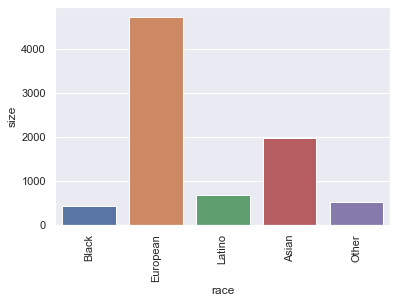

In [140]:
## race proportion
### apply func
def race_number_to_name(x) :
    race_name = None
    if x == 1 :
        race_name = "Black" #/African American
    if x == 2 :
        race_name = "European" #/Caucasian-American
    if x == 3 :
        race_name = "Latino" #/Hispanic American
    if x == 4 :
        race_name = "Asian" #/Pacific Islander/Asian-American
    if x == 5 :
        race_name = "Native American"
    if x == 6 :
        race_name = "Other"

    return race_name

# size by race 
df_race = pd.DataFrame(df_dating.groupby(["race_o"]).size()).reset_index()
df_race = df_race.rename(columns={0 : "size", "race_o" : "race"})
df_race["race"] = df_race["race"].apply(lambda race : race_number_to_name(race))
display(df_race)

# bar plot by race
ax = sns.barplot(x="race", y="size", data=df_race)
ax.tick_params(axis='x', rotation=90)
